<a href="https://colab.research.google.com/github/That1GuyWSSC/IA2024_16/blob/master/Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Learning

This notebook presents examples about some of the foundational concepts of supervised learning.

Decision Trees model of the housing market in paris

Steps:

get the paris house dataset from Kaggle.com

do some (3/4) EDA visualizations/analysis

split into train and test samples

create a decision trees model

assess the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Download dataset from Kaggle
import kagglehub

dataset_path = "mssmartypants/paris-housing-classification"
!kaggle datasets download {dataset_path} -p /content/ --unzip

Dataset URL: https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification
License(s): copyright-authors
  0% 0.00/554k [00:00<?, ?B/s]
100% 554k/554k [00:00<00:00, 83.2MB/s]


In [3]:

# Read the file
path = "/content/ParisHousingClass.csv"
house_data = pd.read_csv(path)

# Prepare data
# To remove missing values: sales_data.dropna(inplace=True)
# To filter qty > 0:        sales_data = sales_data[sales_data["Quantity"] > 0]

# Print head
house_data.head()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
print(house_data['category'].unique())

['Basic' 'Luxury']


Existem duas tipos de categoria o Basic e o Luxury e estas duas vao ser a duas classes differentes depois no final do trabalho.

In [6]:
house_data['category'] = pd.factorize(house_data['category'])[0] + 1
corr = house_data.corr()
corr['category'].sort_values(ascending=False)


,category
category,1.000000
hasPool,0.382995
isNewBuilt,0.381237
hasYard,0.373987
made,0.005399
cityCode,0.003950
hasGuestRoom,0.003110
hasStorageRoom,0.002229
hasStormProtector,0.002182
numberOfRooms,-0.000442


<Axes: >

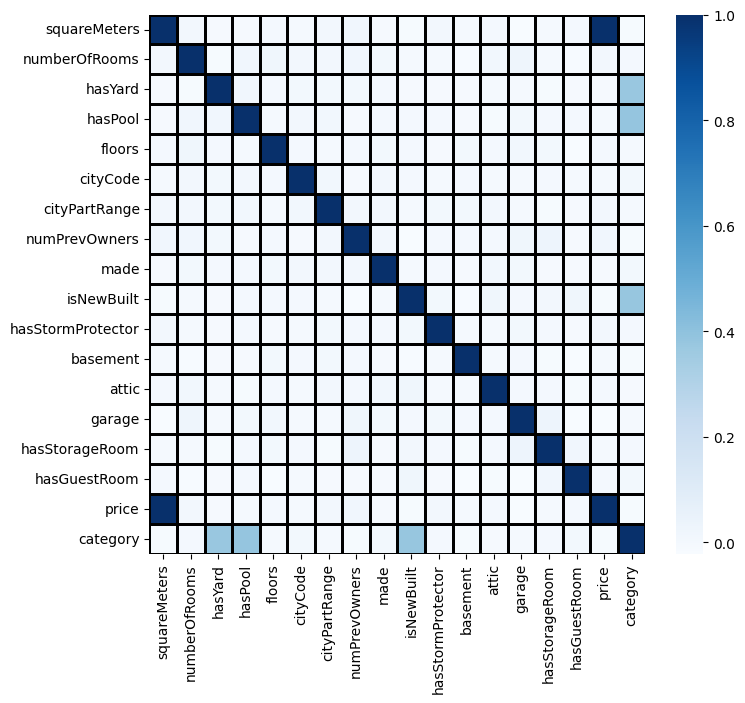

In [7]:
fig = plt.figure(figsize = (8,7))
data_ploting = house_data.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Blues', linecolor='black', linewidths= 2 )

Em resumo, este segmento de código é responsável por:

Separar as caraterísticas (X) da variável de destino (y).
Dividir os dados em conjuntos de dados de treino e de teste, o que é essencial na aprendizagem automática para avaliar o desempenho do modelo em dados não vistos.

In [8]:
X = house_data.drop('category', axis = 1)
y = house_data['category']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)


Esta parte do código prepara os recursos numéricos em X_train e X_test para o aprendizado de máquina.

Criando dois objetos StandardScaler, um para treinar e outro para teste.


Ajustando cada escalonador aos dados de treino X_train e aos dados de teste X_test para aprender a média e o desvio padrão de cada caraterística de cada dado.

Aplicar o escalonamento aos dados de treino X_train para obter um X_train_scaled padronizado.

Aplicar o escalonamento aos dados de teste X_teste para obter um X_teste_escalonado normalizado.


Os dados escalonados (X_treino_escalonado e X_teste_escalonado) estão agora prontos para serem utilizados para treinar um modelo de aprendizagem automática, geralmente melhorando o desempenho e a estabilidade do modelo.




In [9]:
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

Em suma, esta parte do código:

Cria um modelo de classificação de árvore de decisão.

Treina o modelo usando os dados de treino.

Usa o modelo treinado para fazer previsões sobre os dados de teste.


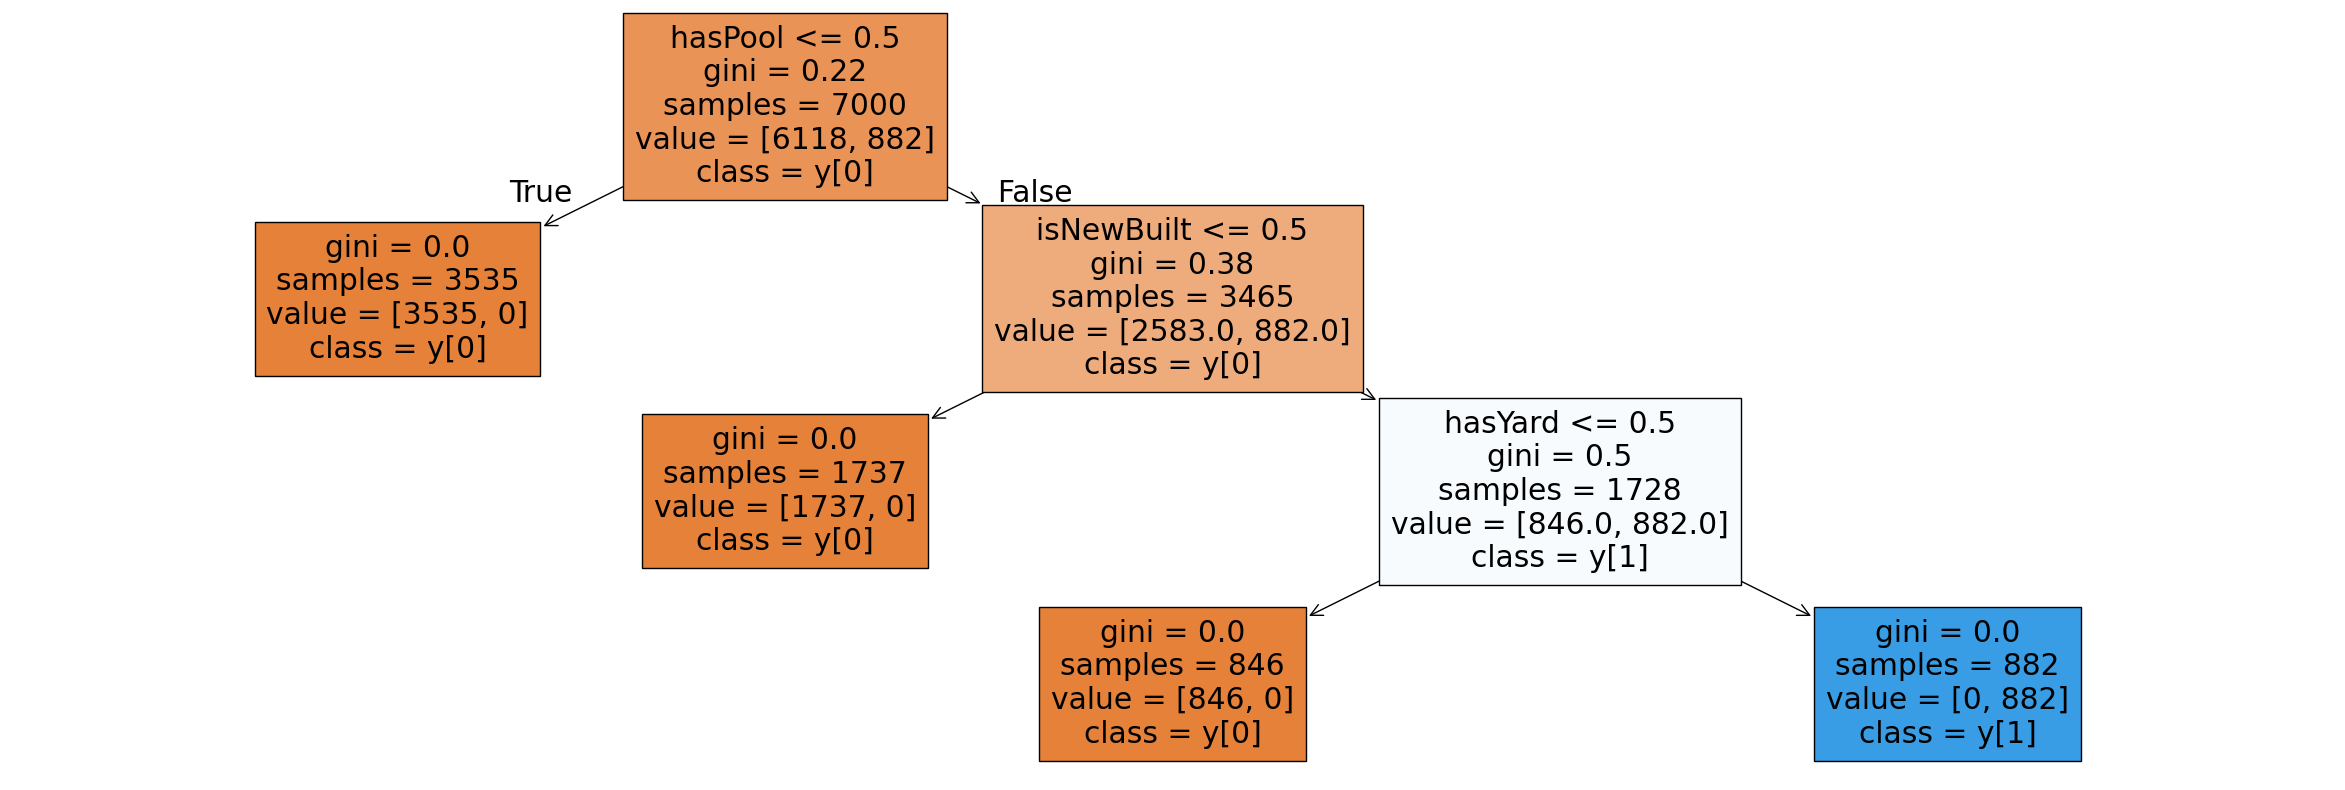

In [10]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

plt.figure(figsize=(30,10)) # adjust figure size as needed
plot_tree(tree_model, filled=True, feature_names = X.columns, class_names=True)
plt.show()

Em resumo, esta secção do código avalia o modelo calculando e imprimindo a RMSE. Ela usa as previsões feitas pelo modelo de árvore de decisão no conjunto de teste escalonado (X_teste_escalonado). O RMSE calculado fornece uma indicação do erro médio de previsão nas mesmas unidades que a variável prevista.

In [11]:
y_pred = tree_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MSE_tree = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree =np.sqrt(MSE_tree)
print(RMSE_tree)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


O codigo que esta em baixo, o accuracy_score(y_test, y_pred) compara as categorias previstas em y_pred com as categorias verdadeiras em y_test e retorna a pontuação de precisão do modelo. A pontuação resultante será um número entre 0 e 1, onde 1 significa que o modelo previu as categorias perfeitamente.

In [12]:
accuracy_score(y_test, y_pred)

1.0

No contexto do notebook, esta linha é utilizada para avaliar o desempenho do DecisionTreeClassifier. Ao examinar a matriz, é possível obter informações sobre quais sao as classes que o modelo esta confunso e onde ele precisa ser melhorado.

O output desta linha de código é uma representação numérica da matriz de confusão.

[TP  FP]

[FN  TN]

In [13]:
confusion_matrix(y_test, y_pred)

array([[2617,    0],
       [   0,  383]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


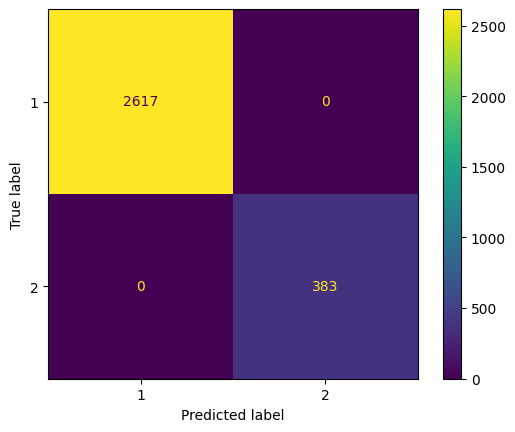

In [14]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test_scaled, y_test)
plt.show()

Em suma, esta linha fornece uma avaliação detalhada de como o modelo de árvore de decisão está a classificar cada categoria dentro do conjunto de teste, dando-lhe uma visão mais detalhada do desempenho do modelo.

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2617
           2       1.00      1.00      1.00       383

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

